In [2]:
import sys  
sys.path.insert(0, '..')
from swf import *
from utils import *
from constants import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit,lsq_linear,brute
from scipy.sparse.linalg import LinearOperator
from scipy.stats import norm
import plotly.express as px
import pandas as pd

In [4]:
from optimal import * 

model = OptimalSWF(verticesOCT,facesOCT).model

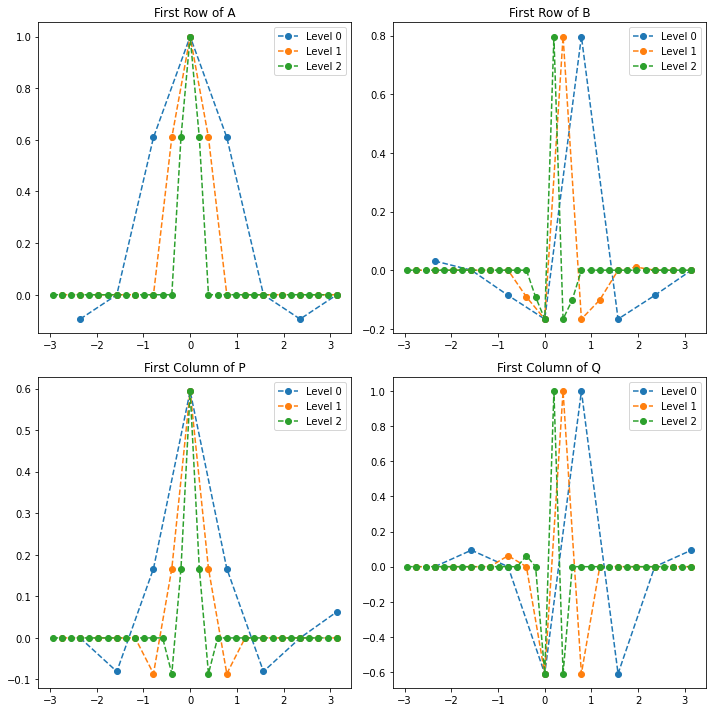

In [5]:
PlotFilters(model.meshes)

In [3]:
def optimizeOCT(coeffs):
    print('.',end='')
    ALPHA, BETA = coeffs
    GAMMA = (1-2*(ALPHA+BETA))/4
    if checkCoeffRelations(ALPHA,BETA,GAMMA):
        mesh = Trimesh(octvertices,octfaces,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA)
        model = SWF(mesh, n=3)
        return cost(model,1,1)
    else:
        return 100

In [4]:
A = LinearOperator((1,2),optimizeOCT)
A

.

<1x2 _CustomLinearOperator with dtype=float64>

In [5]:
aDist = norm(loc=0.61, scale=0.005)
bDist = norm(loc=-0.01, scale=0.005)
aRVS = aDist.rvs(size=1200).reshape((-1,1))
bRVS = bDist.rvs(size=1200).reshape((-1,1))
v = np.hstack((aRVS,bRVS))
g = (1-2*(aRVS+bRVS))/4
b = np.array([])
for i in range(1200):
    b = np.append(b,A.matvec(v[i]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [1]:
df = pd.DataFrame(np.hstack((v,g,b.reshape(-1,1))),columns=['a','b','c','cost'])
fig = px.scatter_3d(df[df.cost], x="a", y="b", z='cost',color='cost')
fig.show()

NameError: name 'pd' is not defined

In [7]:
df[df.cost == df['cost'].min()]

,a,b,c,cost
933,0.609151,-0.015081,-0.047035,0.001298


In [8]:
def optimize704(coeffs):
    print('.',end='')
    ALPHA, BETA = coeffs
    GAMMA = (1-2*(ALPHA+BETA))/4
    if checkCoeffRelations(ALPHA,BETA,GAMMA):
        mesh = Trimesh(vertices704,faces704,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA)
        model = SWF(mesh, n=3)
        return cost(model,1,1)
    else:
        return 100

In [9]:
B = LinearOperator((1,2),optimize704)
B

.

<1x2 _CustomLinearOperator with dtype=float64>

In [10]:
aDist = norm(loc=0.55, scale=0.01)
bDist = norm(loc=0.03, scale=0.01)
aRVS = aDist.rvs(size=1200).reshape((-1,1))
bRVS = bDist.rvs(size=1200).reshape((-1,1))
v = np.hstack((aRVS,bRVS))
g = (1-2*(aRVS+bRVS))/4
b = np.array([])
for i in range(1200):
    b = np.append(b,B.matvec(v[i]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

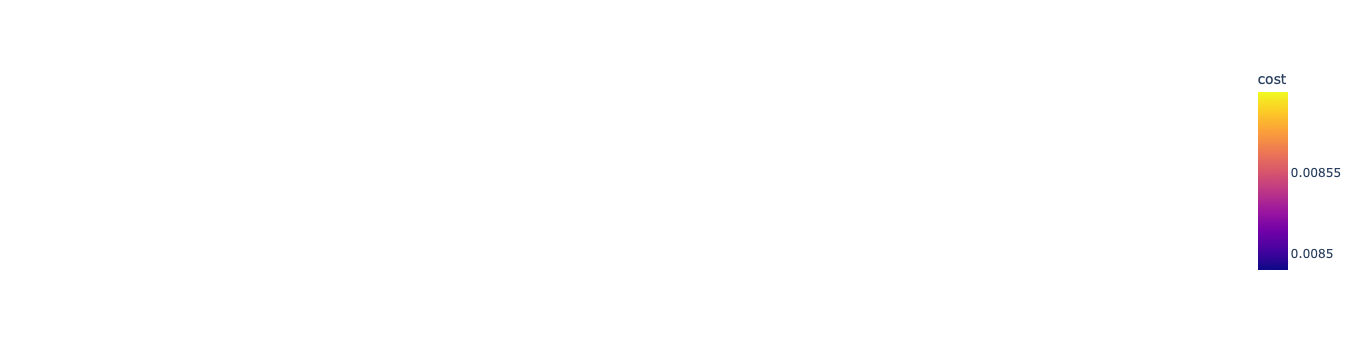

In [11]:
df2 = pd.DataFrame(np.hstack((v,g,b.reshape(-1,1))),columns=['a','b','c','cost'])
fig = px.scatter_3d(df2[df2.cost<0.0086], x="a", y="b", z='cost',color='cost')
fig.show()

In [12]:
df2[df2.cost ==df2['cost'].min()]

,a,b,c,cost
818,0.546418,0.036781,-0.0416,0.00849


In [13]:
def optimize301(coeffs):
    print('.',end='')
    ALPHA, BETA = coeffs
    GAMMA = (1-2*(ALPHA+BETA))/4
    if checkCoeffRelations(ALPHA,BETA,GAMMA):
        mesh = Trimesh(vertices301,faces301,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA)
        model = SWF(mesh, n=3)
        return cost(model,1,1)
    else:
        return 100

In [14]:
C = LinearOperator((1,2),optimize301)
C

.

<1x2 _CustomLinearOperator with dtype=float64>

In [26]:
aDist = norm(loc=0.59, scale=0.01)
bDist = norm(loc=0.03, scale=0.01)
aRVS = aDist.rvs(size=1200).reshape((-1,1))
bRVS = bDist.rvs(size=1200).reshape((-1,1))
v = np.hstack((aRVS,bRVS))
g = (1-2*(aRVS+bRVS))/4
b = np.array([])
for i in range(1200):
    b = np.append(b,C.matvec(v[i]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

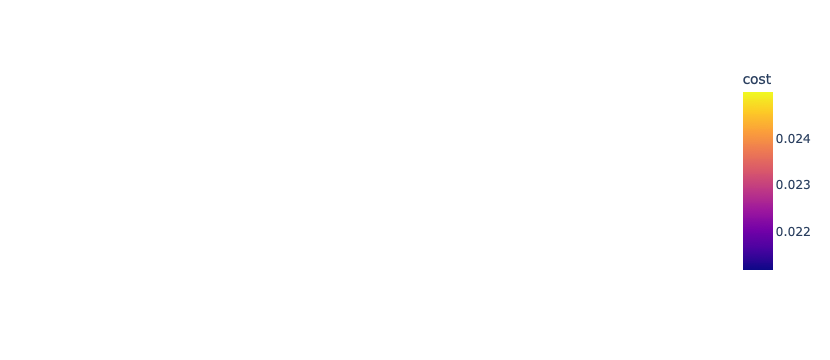

In [29]:
df3 = pd.DataFrame(np.hstack((v,g,b.reshape(-1,1))),columns=['a','b','c','cost'])
fig = px.scatter_3d(df3[df3.cost<0.025], x="a", y="b", z='cost',color='cost')
fig.show()

In [28]:
df3[df3.cost ==df3['cost'].min()]

,a,b,c,cost
60,0.599363,0.033933,-0.066648,0.021162


In [45]:
from scipy.optimize import minimize

def f(coeffs, vertices, faces):
    ALPHA, BETA = coeffs
    GAMMA = (1-2*(ALPHA+BETA))/4
    if checkCoeffRelations(ALPHA,BETA,GAMMA):
        mesh = Trimesh(vertices,faces,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA)
        model = SWF(mesh, n=3)
        return cost(model,1,1)
    else:
        return 100
    
vertices = vertices301
faces = faces301
# initial (bad) guess at (x,y) values
initial_guess = np.array([0.5,0])

res = minimize(f,initial_guess,args = (vertices,faces))

In [46]:
res

      fun: 0.021159389974275182
 hess_inv: array([[ 0.10774912, -0.14368626],
       [-0.14368626,  0.302421  ]])
      jac: array([-3.21073458e-07,  6.27245754e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([0.59873936, 0.03520951])

In [47]:
a,b = res.x
c = (1-2*(a+b))/4

a,b,c

(0.5987393567631336, 0.035209511177226836, -0.06697443397018021)